# Image Classification with Transformers

![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Finance/10.1.Image_Classification_with_Transformers.ipynb)

## Colab Setup

In [ ]:
# Install the johnsnowlabs library to access Spark-OCR and Spark-NLP for Healthcare, Finance, and Legal.
! pip install johnsnowlabs 

In [ ]:
from google.colab import files
print('Please Upload your John Snow Labs License using the button below')
license_keys = files.upload()

Saving latest_3_1_x_spark_nlp_for_healthcare_spark_ocr_5112.json to latest_3_1_x_spark_nlp_for_healthcare_spark_ocr_5112.json


In [ ]:
from johnsnowlabs import * 
# After uploading your license run this to install all licensed Python Wheels and pre-download Jars the Spark Session JVM
# Make sure to restart your notebook afterwards for changes to take effect
jsl.install()

👌 Detected license file /content/latest_3_1_x_spark_nlp_for_healthcare_spark_ocr_5112.json
📋 Stored John Snow Labs License in /root/.johnsnowlabs/licenses/license_number_0_for_Spark-Healthcare_Spark-OCR.json
👷 Setting up John Snow Labs home in /home/ckl/.johnsnowlabs this might take a few minutes.
🙆 JSL Home setup in /root/.johnsnowlabs
Running "/usr/bin/python3 -m pip install https://pypi.johnsnowlabs.com/[LIBRARY_SECRET]spark-ocr/spark_ocr-4.0.1-py3-none-any.whl --force-reinstall"
Running "/usr/bin/python3 -m pip install https://pypi.johnsnowlabs.com/[LIBRARY_SECRET]spark-nlp-internal/spark_nlp_internal-4.1.0-py3-none-any.whl --force-reinstall"
Installing spark-nlp to /usr/bin/python3
Installing pyspark to /usr/bin/python3
Installed 3 products:
🕶 Spark-OCR installed! ✅ Empower your NLP with a set of eyes 
💊 Spark-Healthcare installed! ✅ Heal the planet with NLP! 
🚀 Spark-NLP installed! ✅ State of the art NLP at scale 
🍥 If you are on Google Colab, please restart your Notebook for cha

# Start Spark Session

In [ ]:
from johnsnowlabs import * 
# Automatically load license data and start a session with all jars user has access to
spark = jsl.start()

👌 Detected license file /content/latest_3_1_x_spark_nlp_for_healthcare_spark_ocr_5112.json
📋 Stored new John Snow Labs License in /root/.johnsnowlabs/licenses/license_number_2_for_Spark-Healthcare_Spark-OCR.json
👌 Launched SparkSession with Jars for: 🚀Spark-NLP, 💊Spark-Healthcare, 🕶Spark-OCR


In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# if you want to start the session with custom params as in start function above
def start(SECRET):
    builder = SparkSession.builder \
        .appName("Spark NLP Licensed") \
        .master("local[*]") \
        .config("spark.driver.memory", "16G") \
        .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer") \
        .config("spark.kryoserializer.buffer.max", "2000M") \
        .config("spark.jars.packages", "com.johnsnowlabs.nlp:spark-nlp_2.12:"+PUBLIC_VERSION) \
        .config("spark.jars", "https://pypi.johnsnowlabs.com/"+SECRET+"/spark-nlp-jsl-"+JSL_VERSION+".jar")
      
    return builder.getOrCreate()

#spark = start(SECRET)

# **Identify Receipts in Pictures**

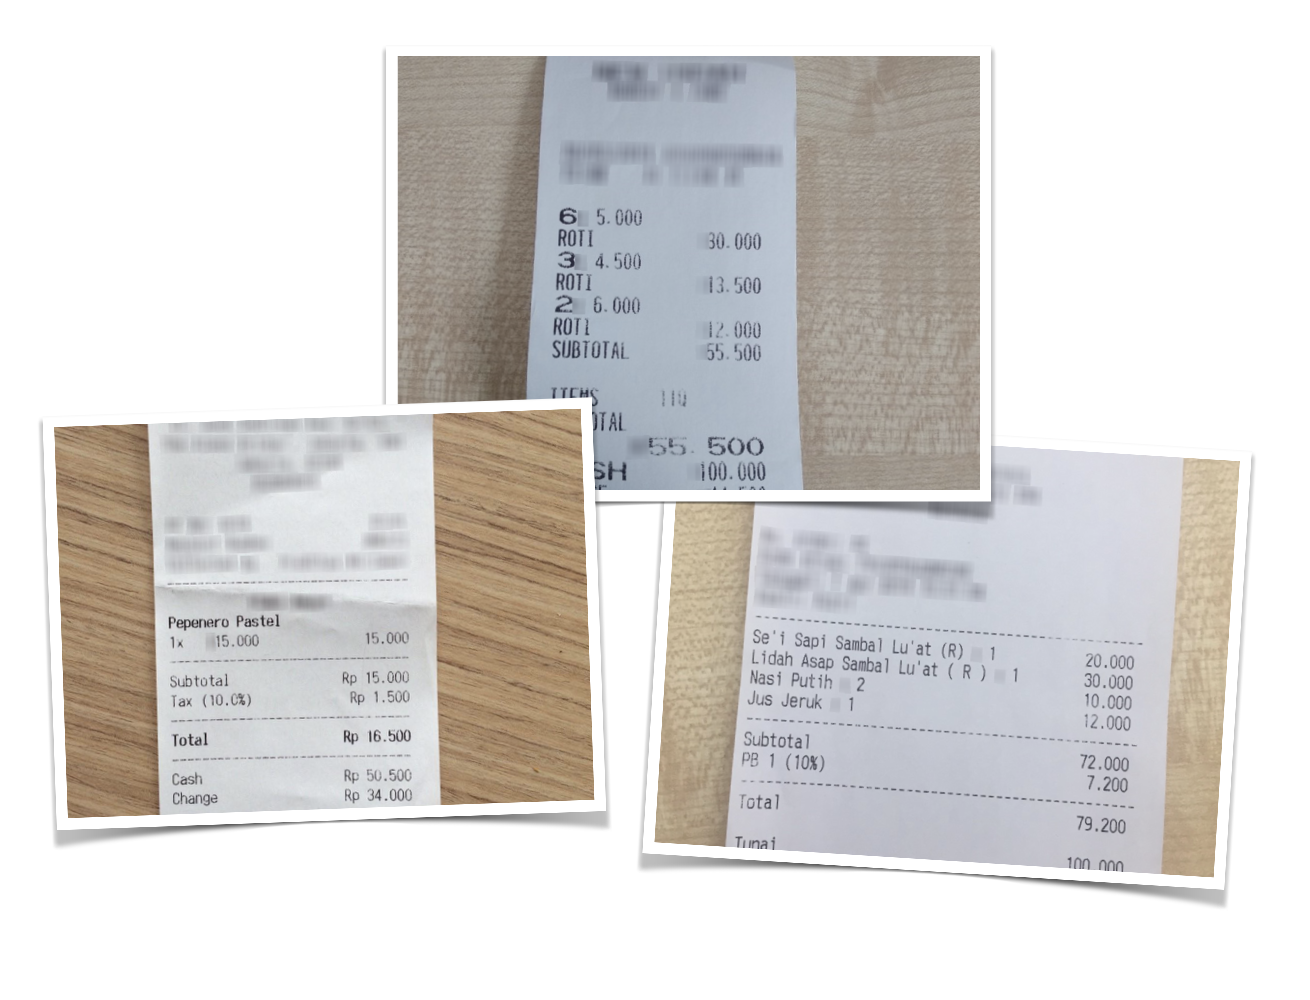

🔎 With this model, you can detect Receipts on both scanned and mobile images using Financial Image Transformers (ViT) in Spark NLP. You can use this model to retrieve all the images which are tickets and then process then using VisualNER, OCR, etc.

🔎 **`finvisualclf_tickets`** is a ViT (Visual Transformer) model, which can be used to carry out Binary Classification (true or false) on pictures / photos / images. This model has been trained in-house with different corpora, including:

* CORD
* COCO
* In-house annotated tickets

🔎 Classes detected by the model:

* **ticket**
* **no_ticket** 

## Load test images

In [ ]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Finance/data/receipt_sample_images/image01.png
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Finance/data/receipt_sample_images/image02.png
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Finance/data/receipt_sample_images/image03.png
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Finance/data/receipt_sample_images/image04.png
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Finance/data/receipt_sample_images/image05.png
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Finance/data/receipt_sample_images/image06.png

In [ ]:
test_image = spark.read\
    .format("image")\
    .option("dropInvalid", value = True)\
    .load("*.png").toDF("image")


In [ ]:
test_image.select("image.origin", "image.width", "image.height").show(truncate=False)

+---------------------------+-----+------+
|origin                     |width|height|
+---------------------------+-----+------+
|file:///content/image05.png|960  |1280  |
|file:///content/image01.png|1108 |1478  |
|file:///content/image02.png|1920 |2889  |
|file:///content/image06.png|1556 |1760  |
|file:///content/image04.png|1275 |1650  |
|file:///content/image03.png|1108 |1478  |
+---------------------------+-----+------+



# Prediction Pipeline

In [ ]:
document_assembler = nlp.ImageAssembler() \
    .setInputCol("image") \
    .setOutputCol("image_assembler")

imageClassifier_loaded = finance.ViTForImageClassification.pretrained("finvisualclf_vit_tickets", "en", "finance/models")\
  .setInputCols(["image_assembler"])\
  .setOutputCol("class")

pipeline = Pipeline().setStages([
                            document_assembler,
                            imageClassifier_loaded])

AttributeError: ignored

# Call pipeline

In [ ]:
result = pipeline.fit(test_image).transform(test_image).cache()

# Show results

In [ ]:
result.show()

In [ ]:
result_df = result.select(F.explode(F.arrays_zip("class.result","class.metadata")).alias("cols"))\
                  .select(F.expr("cols['1']['origin']").alias("images"),
                          F.expr("cols['0']").alias("class"),
                          F.expr("cols['1']['Some(ticket)']").alias("ticket_confidence"),
                          F.expr("cols['1']['Some(no_ticket)']").alias("no_ticket_confidence"))
                          

result_df.show(truncate=False)

In [ ]:
from PIL import Image

image_path = 'image01.png'
pil_im = Image.open(image_path)
display(pil_im)


In [ ]:
result_df.filter(result_df.images == f"file://{image_path}").select("class").show()

In [ ]:
image_path = 'image02.png'
pil_im = Image.open(image_path)
display(pil_im)

In [ ]:
result_df.filter(result_df.images == f"file://{image_path}").select("class").show()